<img src="https://i1.sndcdn.com/avatars-000274765548-vj7h0w-t500x500.jpg" 
style='float:right; width:200px; margin: 0 20px;'>

# Reddit Conversations
---
Hand by hand walkthrough of conversant in reddit.


## Read Data
Lets read conversation data from Change-My-View(CMV) data in pickle format.

One option is to load the data to pandas dataframe

In [1]:
import logging

logging.basicConfig(format='[%(asctime)s] %(levelname)s %(message)s',
                    datefmt='%d/%m/%Y %H:%M:%S', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 115

In [2]:
# reading data to pandas df
from conversant.data.loaders.load import load2df

cmv_df = load2df(path='./3000tree.pickle', input_format='pickle')
cmv_df.sample(5)

[04/03/2020 13:47:26] INFO Conversation sample has 3000 unique trees
[04/03/2020 13:47:26] INFO Conversation sample has 21928 unique authors


,node_id,tree_id,timestamp,author,text,parent,index1
616122,ddxcv9k,5uw4gv,1487474280,ShiningConcepts,I agree that they are not racist in the sense ...,616067,616122
137905,d5qruap,4uhr35,1469493044,quwertie,"""I know you are but what am I!""",137904,137905
533463,dg17e1e,63enew,1491746886,goodolarchie,"Nope, plurality is important here because wage...",533462,533463
608419,dkv0hnb,6q6ba2,1501277637,the_potato_hunter,But the president can't do things unilaterally...,608418,608419
138316,dnxgaug,74d68z,1507175217,jzpenny,"You as well, for sure. Contentious subjects sh...",138315,138316


Working with dataframes is not natural with conversation data. 

A better data type for conversation is trees. 

In [3]:
from conversant.data.loaders.load import load2anytree

# load conversation data to a dictionary like {'post_id' : AnyTree Node object}
cmv = load2anytree(path='./3000tree.pickle', input_format='pickle')

[04/03/2020 13:47:26] INFO Conversation sample has 3000 unique trees
[04/03/2020 13:47:26] INFO Conversation sample has 21928 unique authors
[04/03/2020 13:48:01] INFO Done converting 3000 conversations to trees


cmv is a list of dictionaries. each dictionary contains one conversation tree in reddit cmv.

We can print one random conversation structure. 

In [4]:
from anytree import RenderTree

random_root = cmv[9][457884]

for pre, fill, node in RenderTree(random_root):
    print("%s%s" % (pre, node.author))


[deleted]
├── Hq3473
│   └── [deleted]
│       └── Hq3473
│           └── [deleted]
│               └── Hq3473
├── ZEPHYREFTW
├── Skelletorr
├── [deleted]
├── DylanTheVillyn
│   └── [deleted]
│       └── DylanTheVillyn
├── Bengom
├── SchiferlED
├── teerre
└── SordidDreams


In [5]:
#TODO: add plotting of a tree
from conversant.data.vizualizations.treeplots import print_tree

print_tree(random_root, "sample_tree.png")

True

<img src="sample_tree.png" style='float:center; width:1000px; margin: 0 20px;'>

## Preprocessing
We can use the pre-processing tools to do any number of known conversation processing.

Each function supports both dataframe and AnyTree dictionary structures.

Lets filter out posts that DeltaBot is thire author, and his descendents

In [6]:
from conversant.data.preprocessing.filters import filter_DeltaBot

cmv = filter_DeltaBot(cmv)

[04/03/2020 13:48:01] INFO conversations are now free of DeltaBot and his descendents


## Enrichment 
We can use enrichment to add new relevant data to our conversation data. 
Each function supports both dataframe and AnyTree dictionary structures.
Enrichment's can be done with text data or using the structure of the conversation.

Let's add a new feature called "clean_text" which is a processed version of the "text" field

In [7]:
from conversant.data.enrichment.textual import clean_text_field

cmv_df = clean_text_field(cmv_df)

logging.info('Example clean text')

print(cmv_df.clean_text.sample(1).values[0])

[04/03/2020 13:48:15] INFO Example clean text


_mention_ op has awarded at least one delta in this post all comments that earned deltas from op or other users are listed here r deltalog comments 5w2rg4 in r deltalog please note that a change of view does not necessarily mean a reversal https www reddit com r changemyview wiki index wiki_what_is_a_ 27view 27 3f or that the conversation has ended delta system explained https www reddit com r changemyview wiki deltasystem deltaboards https www reddit com r changemyview wiki deltaboards


## Analysis

We might want to run some exploratory data analysis (EDA) on our conversational data. 

Let's plot the percentiles of the number of posts per conversation.

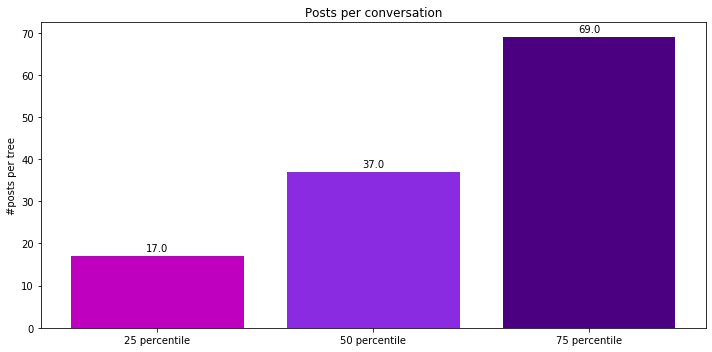

True

In [8]:
from conversant.data.explenatory_analysis.conversation_statistics import posts_per_conversation

posts_per_conversation(cmv_df)

## Upcoming features

* boilerplate models
* enrichment - interaction graph
* enrichment - 3comm community detection? 
